# A Data Science Job Market Demand Analysis
##  Webscraping Monsterindia.com using Selenium

### The goal of this research is to provide answers to these frequently asked questions every aspiring data scientist inquire about?
1. What years of experience are employers looking for?
2.  What are the job roles employers are demanding for? 
3. What are the required skills to become a data scientist (based on the expectations of an employers)?

In [1]:
# loading the important libraries
from time import sleep
from random import randint
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

In [3]:
# Loading Progress bar
from tqdm import tqdm

# intitaiting  data storage
roles = []
company = []
experience = []
location = []
skills = []

# we have 25 job listed on a page
# iterating through 20 webpages
pages = np.arange(1, 501, 25)
for page in tqdm(pages):
    url = "https://www.monsterindia.com/srp/results?start="+str(page)+ "&sort=1&limit=25&query=data%20scientist&searchId=0a018204-fd48-42d4-ac6f-938605fe4106"
    driver.get(url)
    joblist = driver.find_elements_by_css_selector(".card-apply-content")
    sleep(randint(2, 10))
     #print(page
     # Looping through each listed job
    for job in joblist:
        job_role = job.find_element_by_css_selector('.medium').text
        comp_name = job.find_element_by_css_selector('.company-name').text
        years_of_exp = job.find_element_by_css_selector('.exp.col-xxs-12.col-sm-3.text-ellipsis').text
        loc = job.find_element_by_css_selector('.col-xxs-12.col-sm-5.text-ellipsis').text 
        
        
        # Skill elements may or may not be present in some job posts.To avoid NoSuchElement error message,we will use this code to handle it
        try:
            skill = job.find_element_by_css_selector('p.descrip-skills').text
        except NoSuchElementException:  
            pass
        
        roles.append(job_role)
        company.append(comp_name)
        experience.append(years_of_exp)
        location.append(loc)
        skills.append(skill)
 # storing in a pandas dataframe       
ds_jobs = pd.DataFrame({
            "roles":roles,
            "companies":company,
           "experience":experience,
            "locations" :location,
            "skills":skills})
    


100%|██████████| 20/20 [06:19<00:00, 18.96s/it]


In [6]:
# Carrying out a little preprocessing 
ds_jobs["skills"] = ds_jobs["skills"].str.replace("Skills :", " ")

In [9]:
# Saving dataframe to a csv file named all_job
ds_jobs.to_csv('ds_jobs.csv')

In [2]:
# Reading our stored database
ds_jobs = pd.read_csv('ds_jobs.csv',index_col=0)

In [3]:
# Checking the head of our data 
ds_jobs.head()

,roles,companies,experience,locations,skills
0,Data Analyst/ Scientist,Sonu Kumar (Proprietor Of Bicano Tech Silca),0-3 Years,"Mumbai, Pune",Data Scientist
1,data scientist,Atish Arun Sonune (Proprietor Of Tata Techno S...,0-2 Years,Cochin / Kochi / Ernakulam,Data Scientist
2,Data Scientist,Yashodha S M (Proprietor Of Co Inter Technology),0-2 Years,Chennai,Data Scientist
3,Data Scientist,Yashodha S M (Proprietor Of Co Inter Technology),0-2 Years,Kozhikode / Calicut,"data architech , Data Analyst , Data scientist"
4,Data Scientist,Js It Tech Solutions,3-5 Years,Hyderabad / Secunderabad,"Deep Learning , Computer Vision"


In [4]:
# Checking the tail of our data
ds_jobs.tail()

,roles,companies,experience,locations,skills
470,DATA ANALYST,Advance Jobs Private Limited,3-8 Years,"Delhi, Gurgaon / Gurugram","Data Analyst , R , Data Analytics , Python ,..."
471,"Online Data Entry Jobs, Work at Home Jobs, Sim...",Company Name Confidential,0-5 Years,"Hyderabad / Secunderabad, Mumbai, Mumbai City,...","Position: Fresher , Data Entry Operator , Da..."
472,Online Data Entry Jobs - Work From Home - Part...,Sky Work Solution,0-3 Years,"Bengaluru / Bangalore, Navi Mumbai","Typing , Data Entry"
473,"Online Data Entry Jobs, Work From Home Jobs, D...",Company Name Confidential,0-5 Years,"Bengaluru / Bangalore, Hyderabad / Secunderabad","Work From Home , Data Entry , Data Entry Ope..."
474,Data Science AI Specialist,A Thingz Solutions Private Limited,6-10 Years,"Hyderabad / Secunderabad, Visakhapatnam","Data Science , Artificial Intelligence"


### Data Preprocessing
* Let's do some further data cleaning process

In [5]:
# Checking for missing data
ds_jobs.isnull().sum()

roles         0
companies     0
experience    0
locations     0
skills        0
dtype: int64

In [6]:
ds_jobs.duplicated().sum()

16

In [7]:
# Checking for duplicates in our data
ds_jobs[ds_jobs.duplicated(subset=["roles","companies","experience","locations","skills"])].shape

(16, 5)

In [8]:
# To see all the duplicated roles
ds_jobs.loc[ds_jobs.duplicated(keep=False), :].shape
# ds_jobs.loc[ds_jobs.duplicated(), :]

(30, 5)

In [9]:
# Let's drop our duplicate value
ds_jobs.drop_duplicates(keep="last",inplace=True)
ds_jobs.shape

(459, 5)

In [10]:
#let's lower case all the strings to avoid redundancy
ds_jobs = ds_jobs.apply(lambda x: x.astype(str).str.lower())

In [11]:
# Splitting our location and skills attcahed to each job role
ds_jobs.skills=[skill.split(",") for skill in ds_jobs.skills]
ds_jobs.locations=[location.split(",") for location in ds_jobs.locations]
ds_jobs.head()

,roles,companies,experience,locations,skills
0,data analyst/ scientist,sonu kumar (proprietor of bicano tech silca),0-3 years,"[mumbai, pune]",[ data scientist]
1,data scientist,atish arun sonune (proprietor of tata techno s...,0-2 years,[cochin / kochi / ernakulam],[ data scientist]
2,data scientist,yashodha s m (proprietor of co inter technology),0-2 years,[chennai],[ data scientist]
3,data scientist,yashodha s m (proprietor of co inter technology),0-2 years,[kozhikode / calicut],"[ data architech , data analyst , data scie..."
4,data scientist,js it tech solutions,3-5 years,[hyderabad / secunderabad],"[ deep learning , computer vision]"


In [13]:
# unstacking the skills column and counting it
#skills_count = ds_jobs.skills.apply(pd.Series).stack().value_counts()
#skills_count.head(50)

## Exploratory Data Analysis
### Lets begin to answer some of our research questions

### 1. What years of experience are employers looking for?

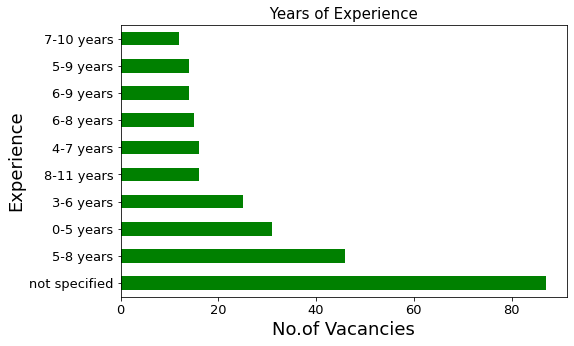

In [14]:
ds_jobs["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="g")
plt.title(" Years of Experience ",fontsize=15)
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

### Required Years of Experience
*  Unspecified years: we can assume that the employers are open to all level of experience possessed by any data scientist(fresh graduates, mid-level, and experienced) as long as you can show your competencies at the job. 

### 2. What are the job roles employers are demanding for?

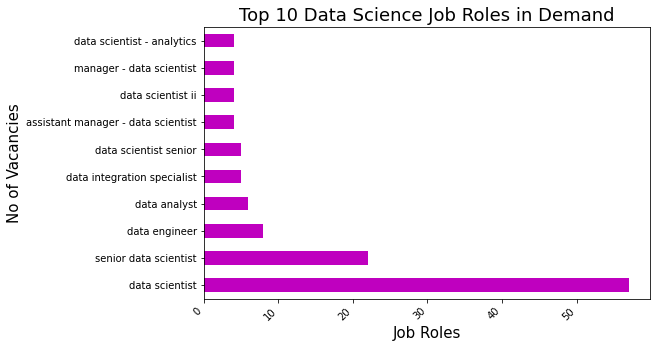

In [15]:
ds_jobs["roles"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=10,color="m")
plt.xticks(rotation=45,ha='right')
plt.title("Top 10 Data Science Job Roles in Demand",fontsize=18)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Job Roles",fontsize=15)
plt.show()

### The Top 10 Data Science Role in demand
* More than 60% of the job advert are demanding for a data scientist position
* The role of a senior data scientist is also getting the buzz. I believe this is a more suited role for an experienced data scientist.

## THE MAIN REASON WE CARRIED OUT THIS RESEARCH

### 3. What are the required skills to become a data scientist (based on the expectations of an employers)?

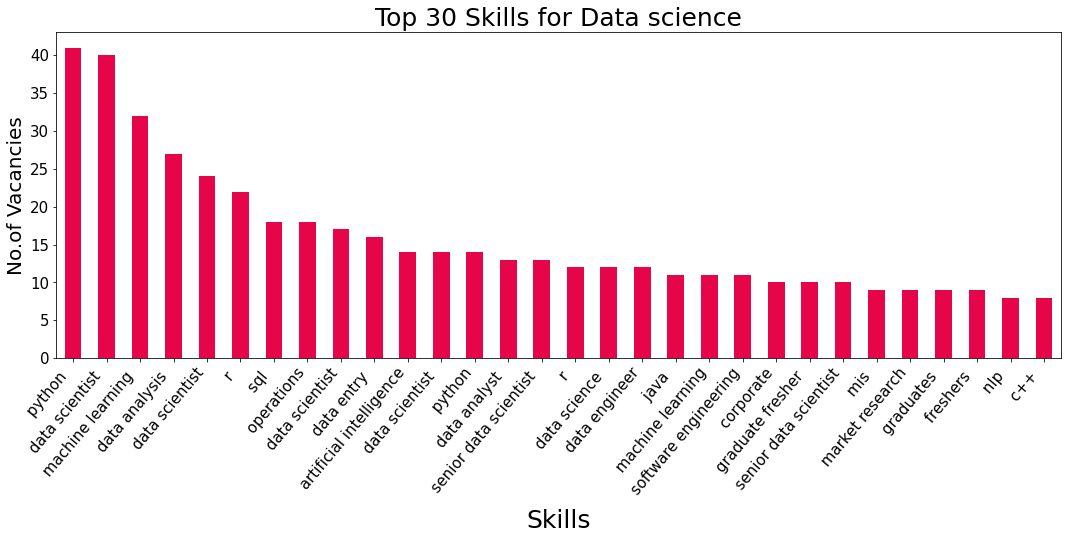

<Figure size 432x288 with 0 Axes>

In [16]:
ds_jobs.skills.apply(pd.Series).stack().value_counts()[:30].plot(kind="bar",figsize=(18,6),fontsize=15,color="#e60548")
plt.xticks(rotation=50,ha='right')
plt.title("Top 30 Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Skills",fontsize=25)
plt.show()

plt.savefig('Top_Required_Skills.png')

### I know the chart above is overwelming, so let's break it down below

### UNSTACKING THE SKILLS COLUMN

In [17]:
# Creating a new dataframe for the skills column: unstacking it and counting it
sk1=pd.DataFrame(ds_jobs.skills.apply(pd.Series).stack().value_counts()).reset_index()
sk1.columns = ["skills","count"]
sk1.head()

,skills,count
0,python,41
1,data scientist,40
2,machine learning,32
3,data analysis,27
4,data scientist,24


### 3.1 The Must Have Skills 

In [18]:
# finding the top skills for Data science in general
# we put it in a dictionary
datascience={}
datascience['statistics']=sk1["count"][sk1['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=sk1["count"][sk1['skills'].str.contains('machine | ml', regex=True)].sum()
datascience['data_analysis']=sk1["count"][sk1['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=sk1["count"][sk1['skills'].str.contains('mining ', regex=True)].sum()
datascience['nlp']=sk1["count"][sk1['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['deep_learning']=sk1["count"][sk1['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=sk1["count"][sk1['skills'].str.contains('big ', regex=True)].sum()

from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': 72,
 'data_analysis': 68,
 'deep_learning': 20,
 'nlp': 16,
 'big_data': 14,
 'statistics': 13,
 'data_mining': 6}

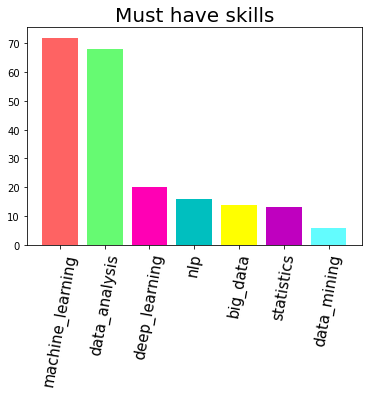

In [19]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#ff00b4","c","#ffff00","m","#63FCFE","#1e32c8"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

#### Must Have Skills
* It is important for an aspiring data scientist to have deep knowledge and understanding of machine learning and data analysis
* Additional it is also important to understand deep learning, natural language processing(nlp),big_data and statistics

### 3.2 Programming Languages in Demand

In [21]:
# Finding the commonly demanded programming lamguage for data scientist
# We put it in a dictionary
languages={}

languages["python"]=sk1["count"][sk1['skills'].str.contains('python|numpy ', regex=True)].sum()
languages["r"]=sk1["count"][sk1['skills'].str.contains("^.r", regex=True)].sum()
languages["matlab"]=sk1["count"][sk1['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=sk1["count"][sk1['skills'].str.contains('java$|java', regex=True)].sum()
languages["c++"]=sk1["count"][sk1['skills'].str.contains('c\+| c#', regex=True)].sum()
languages["sas"]=sk1["count"][sk1['skills'].str.contains('sas', regex=True)].sum()
languages["scala"]=sk1["count"][sk1['skills'].str.contains('scala', regex=True)].sum()

#Let's identify the Sql first 
sql=sk1[sk1['skills'].str.contains('sql', regex=True)]
# Seperating the nosql and plsql from the list
languages["sql"]=sql["count"][~sql['skills'].str.contains('no | p ', regex=True)].sum()

# To sort the programming languages in the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))
languages

{'python': 65,
 'sql': 36,
 'r': 33,
 'java': 24,
 'sas': 16,
 'c++': 15,
 'matlab': 7,
 'scala': 5}

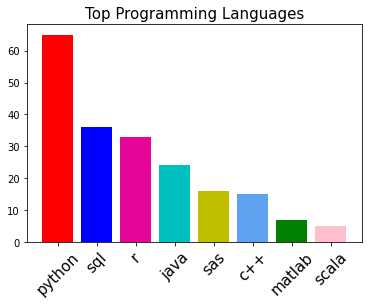

<Figure size 432x288 with 0 Axes>

In [22]:
plt.bar(languages.keys(),languages.values(),color=["r","b","#e60599","c","y","#5fa2f0","g","pink"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Top Programming Languages",fontsize=15)
plt.show()

plt.savefig('.png')

#### Top programming language for a data science job role 
* More than 60% of employer preferred python programming language for a data scientist job role
* SQL and r and java are also getting the buzz

### 3.3. Top Deep learning frameworks

In [23]:
# Finding the commonly demanded deep learning framework for a  data science role
# We put it in a dictionary

frameworks={}

frameworks['tensorflow']=sk1["count"][sk1['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=sk1["count"][sk1['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=sk1["count"][sk1['skills'].str.contains('torch', regex=True)].sum()
frameworks['mxnet']=sk1["count"][sk1['skills'].str.contains('mxnet', regex=True)].sum()

# To sort the popular Deep Learning Framework in the dictionary
frameworks = dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))
frameworks

{'tensorflow': 8, 'pytorch': 4, 'keras': 2, 'mxnet': 1}

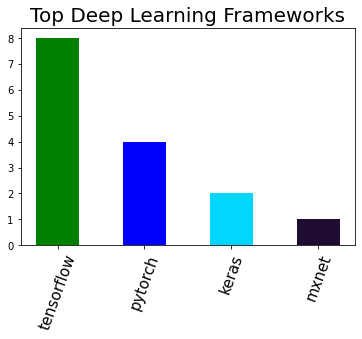

In [24]:
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","#00d7ff","#1e0c32"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Top Deep Learning Frameworks",fontsize=20)
plt.show()

#### Top Deep Learning Framework
* Tensorflow and pytorch seems to be the most preffered deep learning frame work employers are looking for in a data science job role.

### 3.4. Cloud Services for a Data Science Job

In [26]:
#lets find the skills based on cloud providers
# We put it in a dictionary
cloud={}

cloud['aws']=sk1["count"][sk1['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=sk1["count"][sk1['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=sk1["count"][sk1['skills'].str.contains('gcp')].sum()


# To sort the popular popular cloud services provider in the dictionary
cloud = dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))
cloud

{'aws': 7, 'azure': 3, 'gcp': 1}

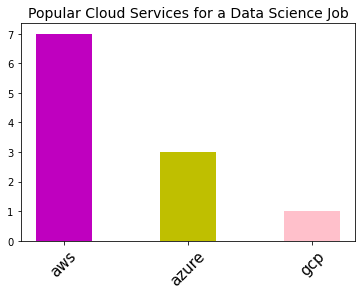

In [27]:
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Popular Cloud Services for a Data Science Job",fontsize=14)
plt.show()


### 3.5. Big data technologies for Data science

In [28]:
# We put it in a dictionary
bigdata={}

bigdata["spark"]=sk1["count"][sk1['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=sk1["count"][sk1['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["kafka"]=sk1["count"][sk1['skills'].str.contains('kafka', regex=True)].sum()

bigdata = dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))
bigdata

{'spark': 12, 'hadoop': 5, 'kafka': 1}

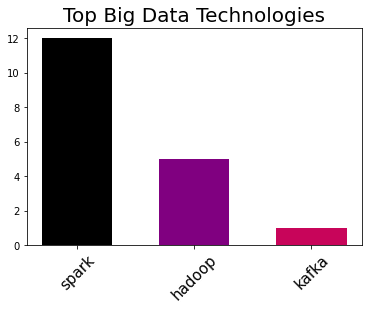

In [29]:
plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","#c8055a"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Top Big Data Technologies",fontsize=20)
plt.show()

### 3.6 Business Intelligence Tools

In [30]:
# Popular business intelligence tools
# We put it in a dictionary
bitools={}
bitools["tableau"]=sk1["count"][sk1['skills'].str.contains('tableau', regex=True)].sum()
bitools["power_bi"]=sk1["count"][sk1['skills'].str.contains('power', regex=True)].sum()

bitools = dict(sorted(bitools.items(), key=itemgetter(1),reverse=True))
bitools

{'tableau': 7, 'power_bi': 3}

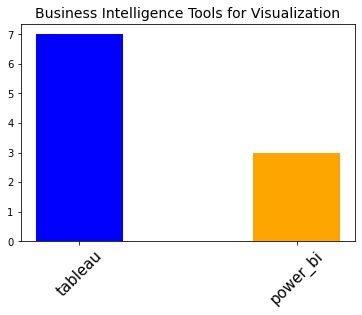

In [31]:
plt.bar(bitools.keys(),bitools.values(),color=["blue","orange"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Business Intelligence Tools for Visualization",fontsize=14)
plt.show()

#### The Business intelligence tools for a data science job role 
* Tableau and Power Bi helps companies derive actionable insight from their data, create interactive dashboards and reports that can turn to positive decision and results.

### References
* https://www.kdnuggets.com/2020/08/employers-expecting-data-scientist-role-2020.html

* https://Monsterindia.com
